In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('/content/drive/My Drive/506_Final_Project/Add_to_GitHub/cleaned_weather_data.csv')
df.head()

,weather_code,max_temp,min_temp,mean_temp,snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (mp/h),range_temp,LA,Boston,Chicago,Year,Phase_encoded
0,0,74.3,50.0,61.4,0.0,0,9.0,24.3,1,0,0,2019,2
1,0,76.2,49.1,61.4,0.0,0,7.7,27.1,1,0,0,2019,2
2,0,77.7,42.6,58.3,0.0,0,9.6,35.1,1,0,0,2019,2
3,0,81.8,49.1,62.8,0.0,0,7.4,32.7,1,0,0,2019,2
4,2,84.5,56.9,66.8,0.0,0,7.5,27.6,1,0,0,2019,2


## Model Testing (Without Hyperparamters)

In [ ]:
X = df.drop(columns=['max_temp', 'min_temp', 'mean_temp'])
y = df['mean_temp']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

Linear Regression Metrics:
MSE: 214.43131055966845
R^2: 0.16204747706967526
Adjusted R^2: 0.1543315238198565



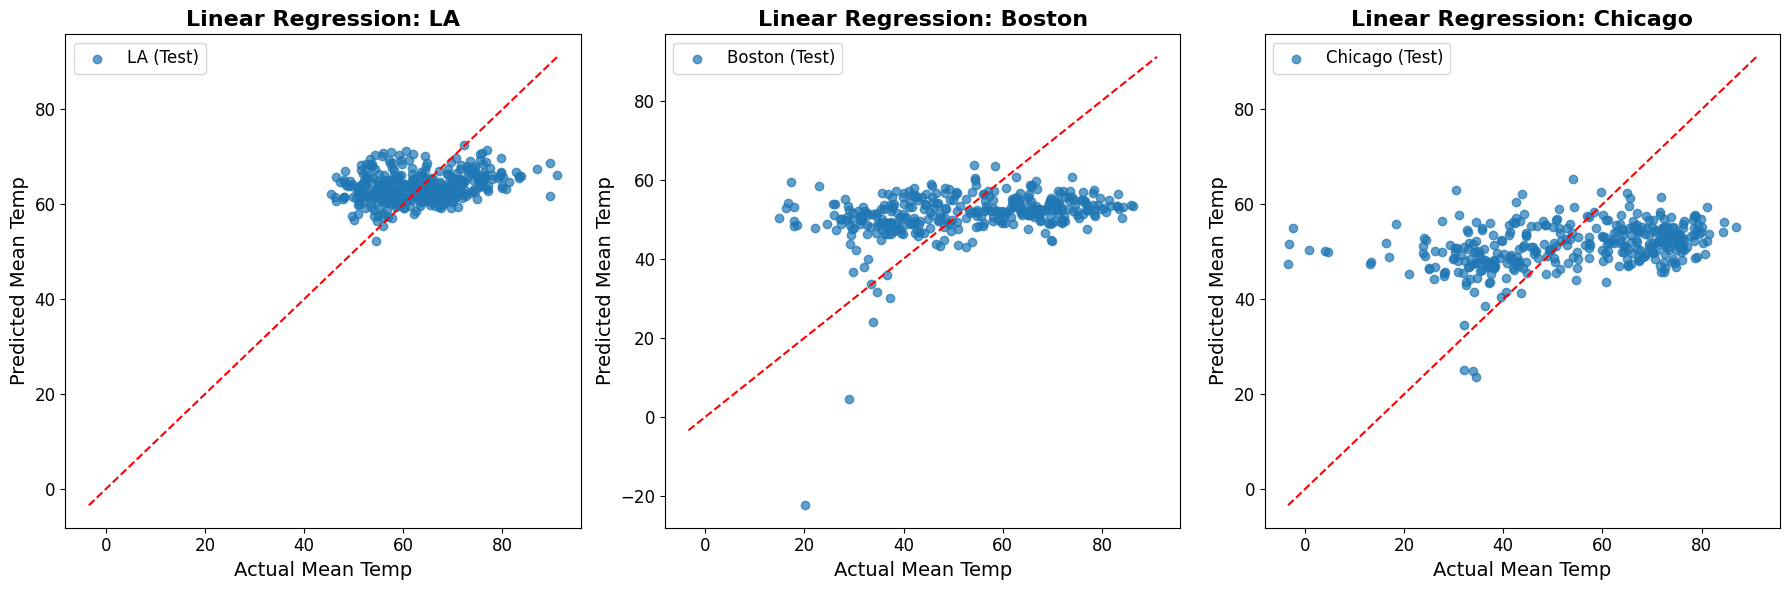

In [ ]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Calculating metrics
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
adj_r2_lin_reg = 1 - (1 - r2_lin_reg) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"Linear Regression Metrics:")
print(f"MSE: {mse_lin_reg}")
print(f"R^2: {r2_lin_reg}")
print(f"Adjusted R^2: {adj_r2_lin_reg}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_lin_reg[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'Linear Regression: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### Decision Tree Regressor

Decision Tree Metrics:
MSE: 285.5049134001823
R^2: -0.11569323466926718
Adjusted R^2: -0.12596665303638743



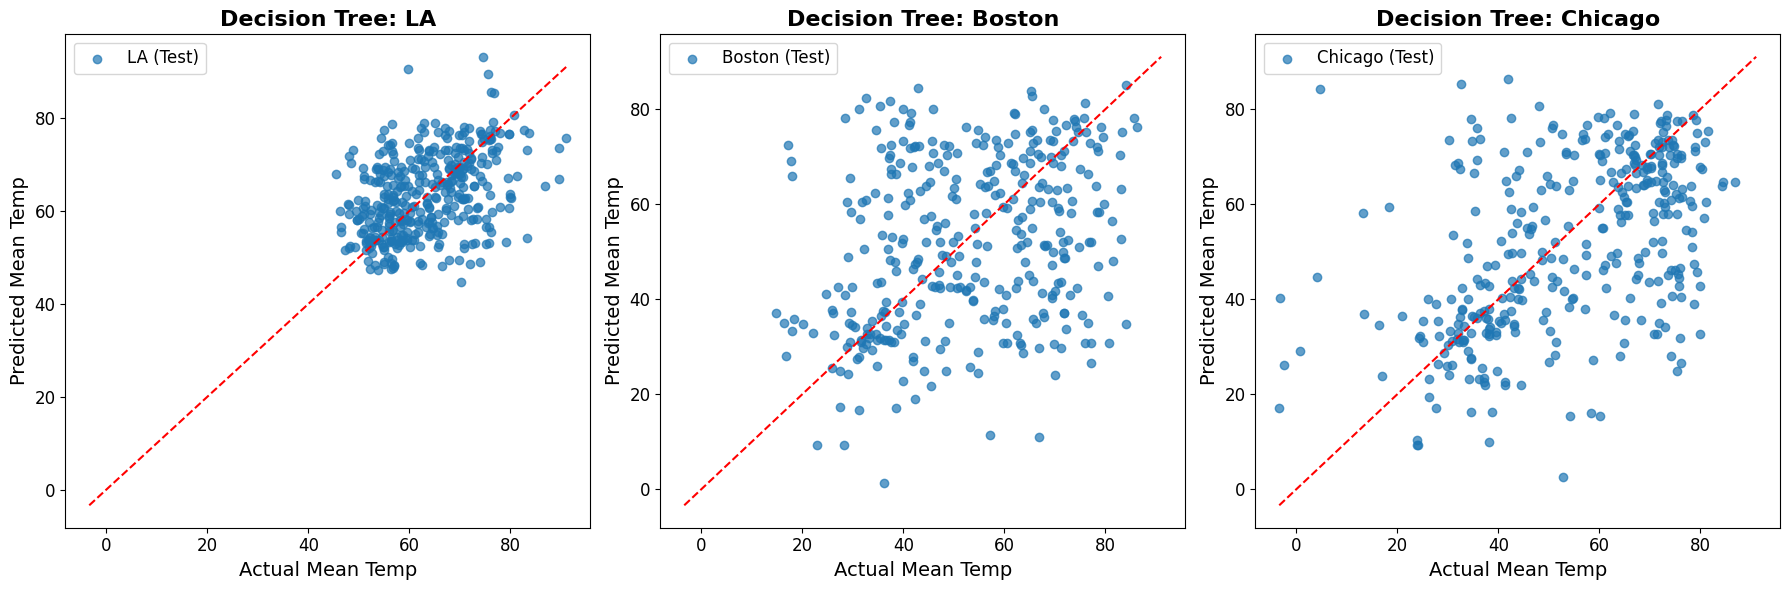

In [ ]:
# Decision Tree Regressor Model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_reg.predict(X_test_scaled)

# Calculating metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
adj_r2_dt = 1 - (1 - r2_dt) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"Decision Tree Metrics:")
print(f"MSE: {mse_dt}")
print(f"R^2: {r2_dt}")
print(f"Adjusted R^2: {adj_r2_dt}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_dt[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'Decision Tree: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### Random Forest

Random Forest Metrics:
MSE: 149.9653682887674
R^2: 0.41396683916278976
Adjusted R^2: 0.40857058537975843



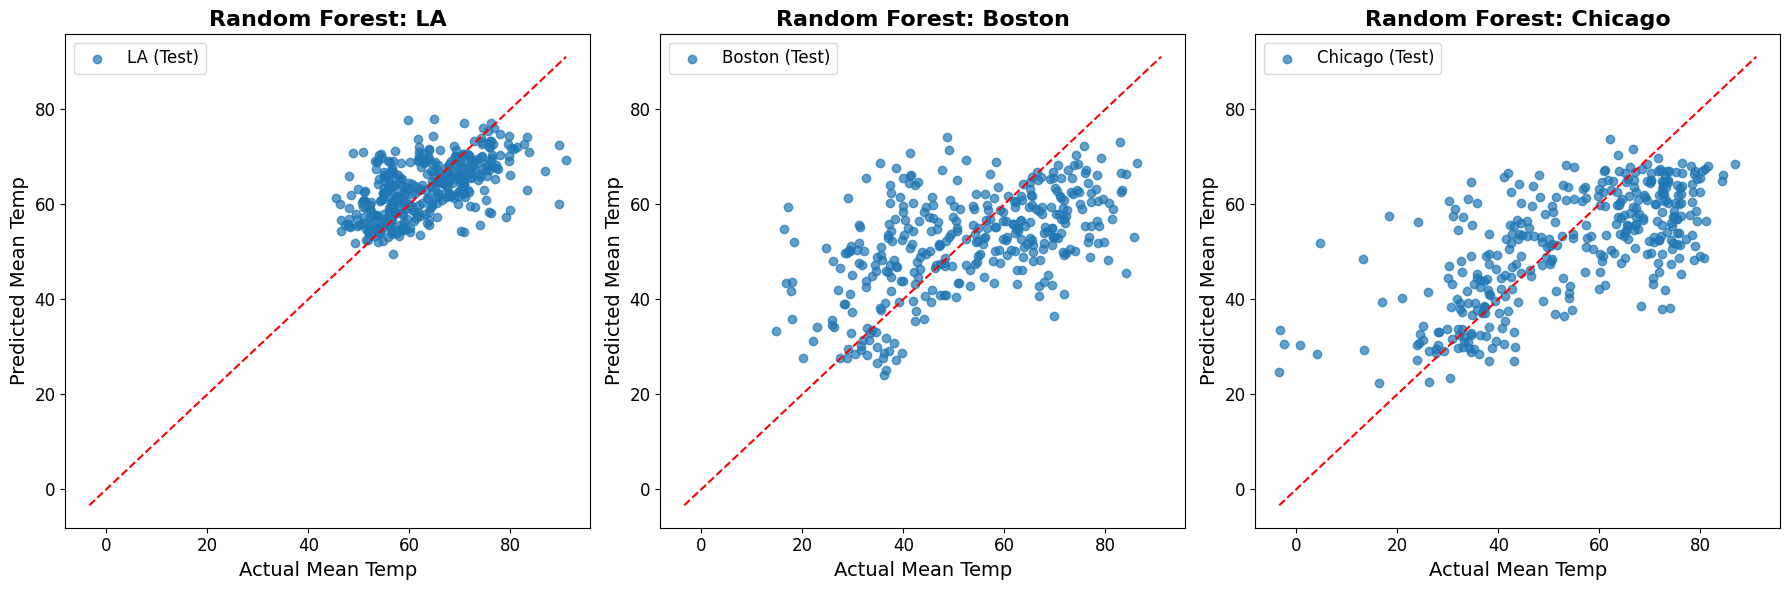

In [ ]:
# Random Forest Regressor Model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test_scaled)

# Calculating metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"Random Forest Metrics:")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")
print(f"Adjusted R^2: {adj_r2_rf}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_rf[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'Random Forest: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### XGBoost

XGBoost Metrics:
MSE: 159.05568198852495
R^2: 0.37844380253600785
Adjusted R^2: 0.37272044896819945



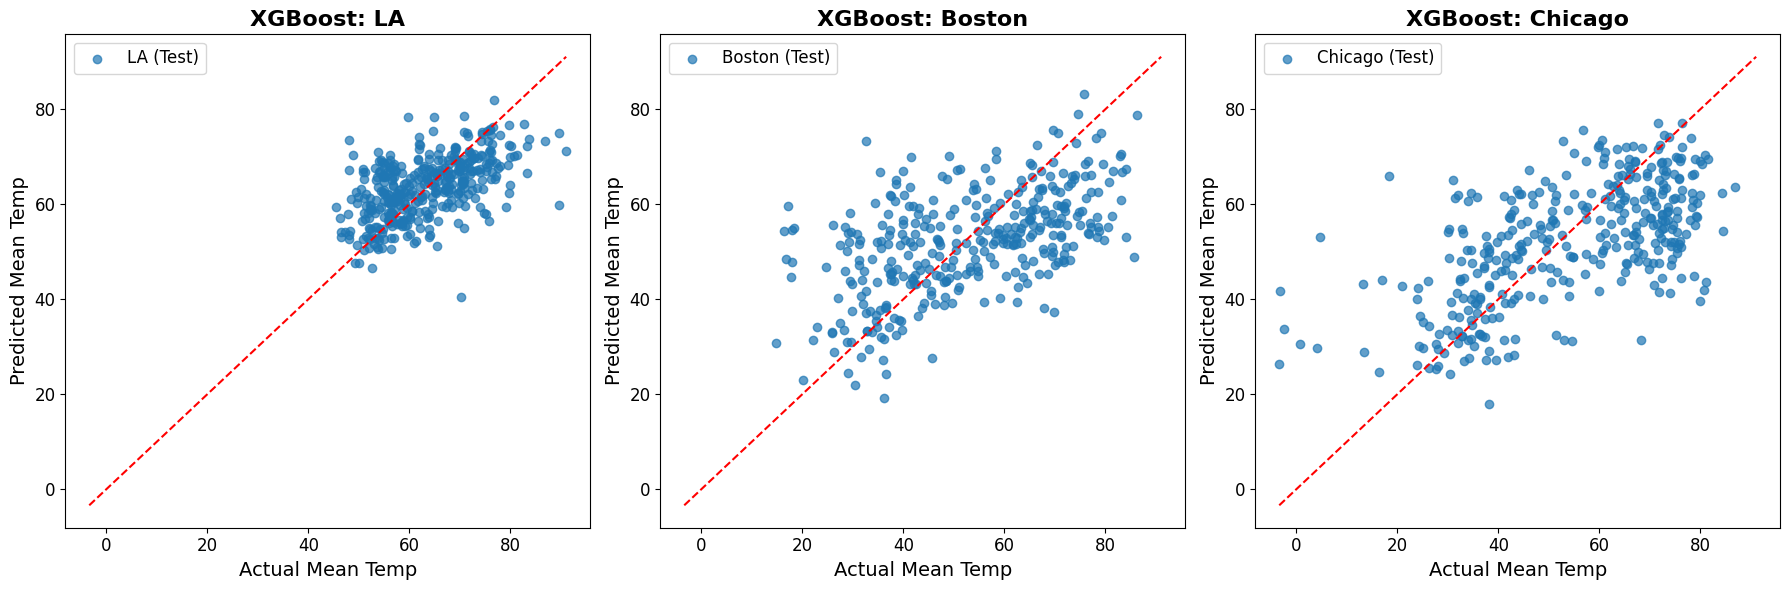

In [ ]:
# XGBoost Regressor Model
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Calculating metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = 1 - (1 - r2_xgb) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"XGBoost Metrics:")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")
print(f"Adjusted R^2: {adj_r2_xgb}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_xgb[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'XGBoost: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### Gradient Boosting

Gradient Boosting Metrics:
MSE: 146.2178519201961
R^2: 0.42861134601009176
Adjusted R^2: 0.4233499403564094



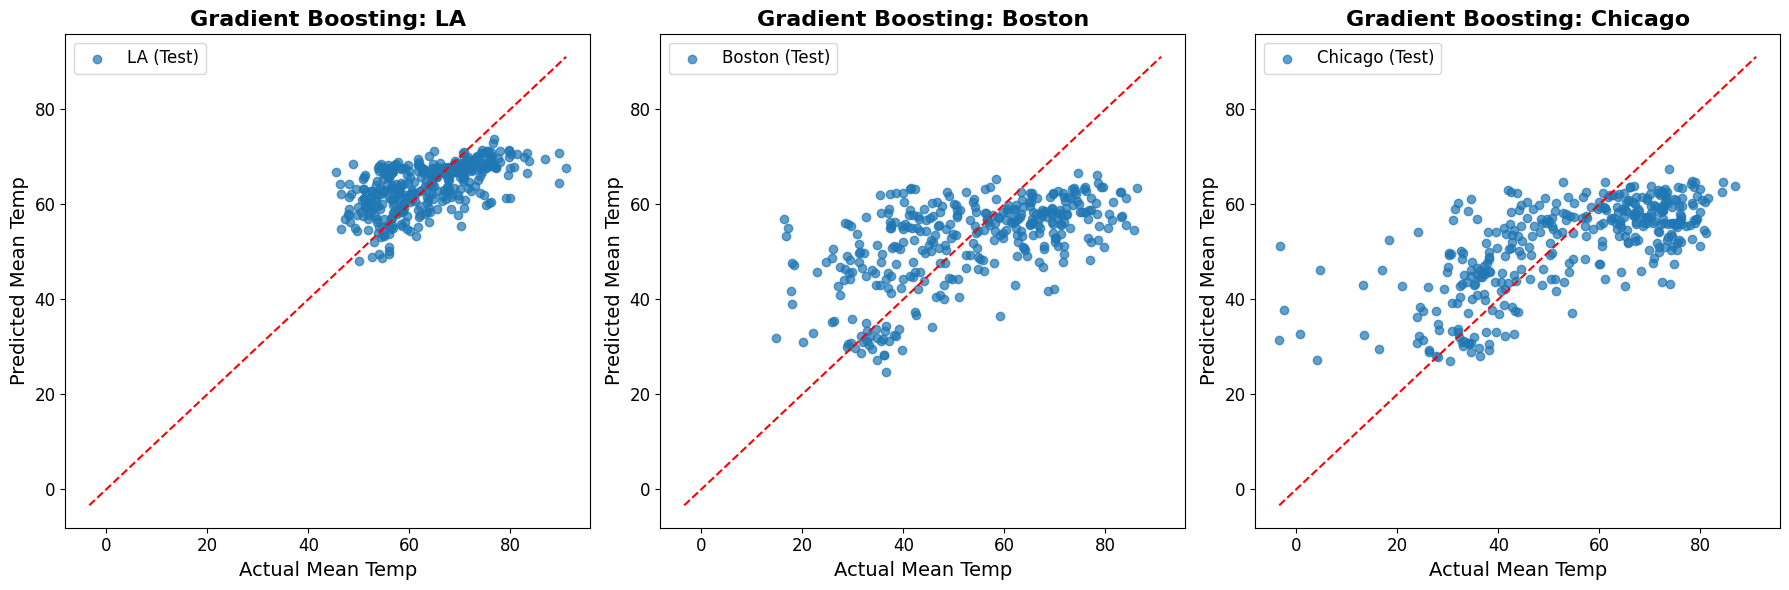

In [ ]:
# Gradient Boosting Regressor Model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_reg.predict(X_test_scaled)

# Calculating metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
adj_r2_gb = 1 - (1 - r2_gb) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"Gradient Boosting Metrics:")
print(f"MSE: {mse_gb}")
print(f"R^2: {r2_gb}")
print(f"Adjusted R^2: {adj_r2_gb}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_gb[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'Gradient Boosting: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### KNN

KNN Metrics:
MSE: 202.45535460346397
R^2: 0.20884699753994507
Adjusted R^2: 0.20156197910108642



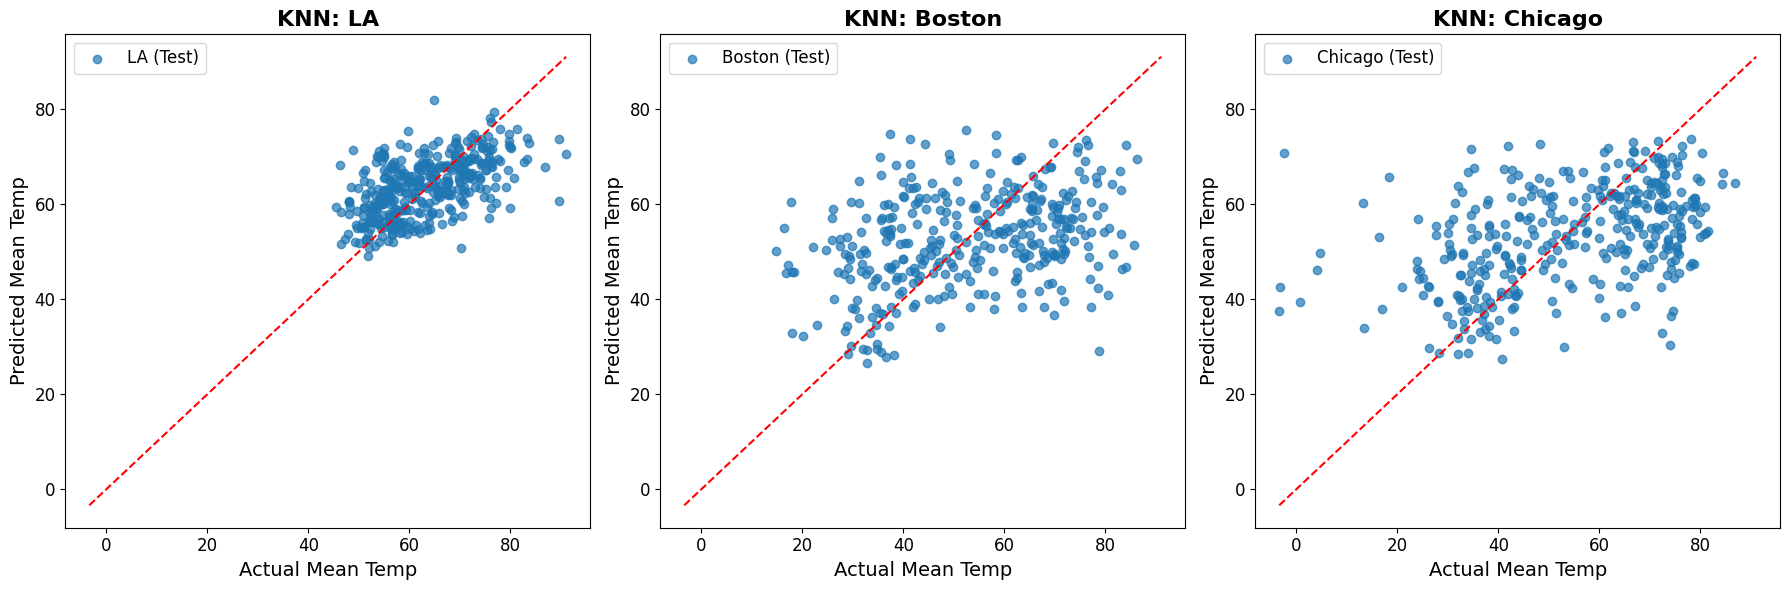

In [ ]:
# K-Nearest Neighbors Regressor Model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test_scaled)

# Calculating metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
adj_r2_knn = 1 - (1 - r2_knn) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"KNN Metrics:")
print(f"MSE: {mse_knn}")
print(f"R^2: {r2_knn}")
print(f"Adjusted R^2: {adj_r2_knn}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_knn[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'KNN: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

###SVM

SVM Metrics:
MSE: 180.1327732306903
R^2: 0.29607895695301856
Adjusted R^2: 0.28959717939273333



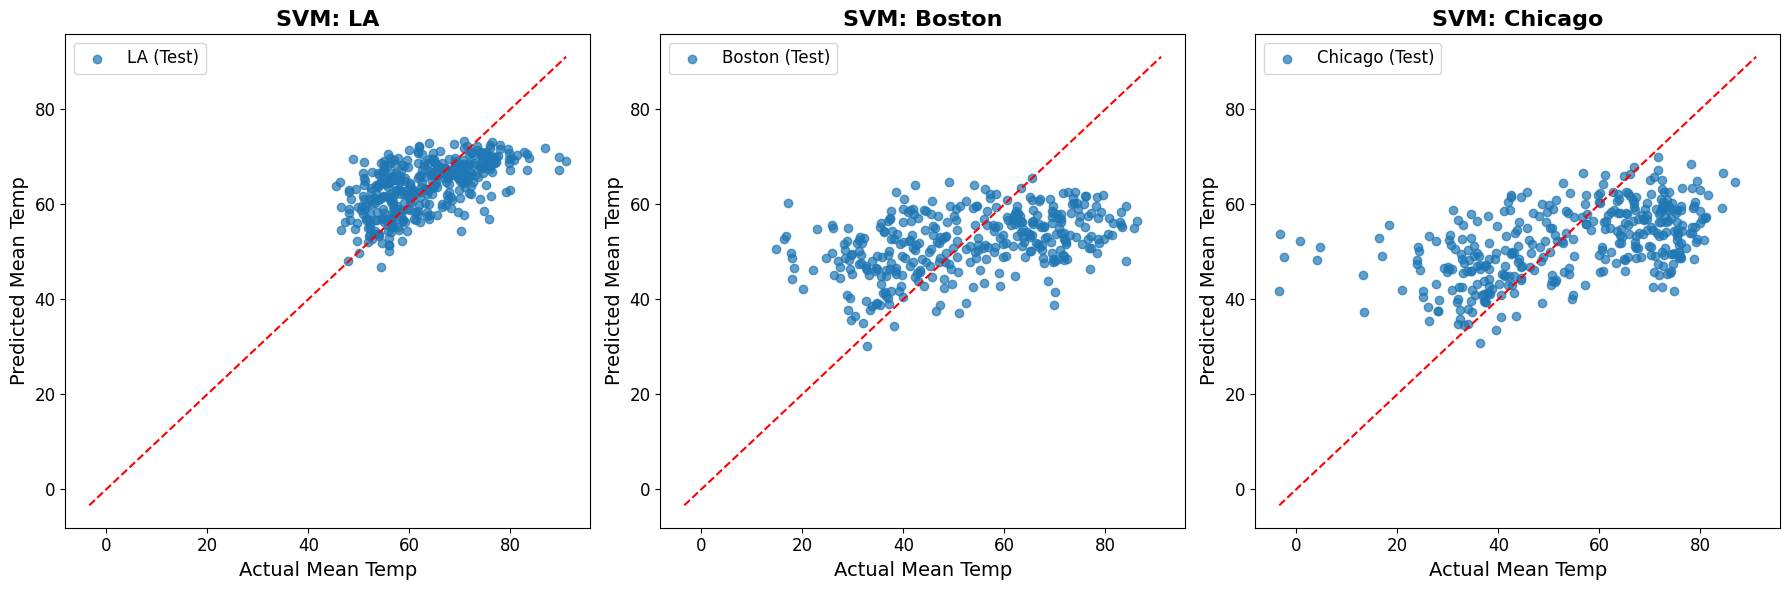

In [ ]:
svm_reg = SVR()
svm_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_reg.predict(X_test_scaled)

# Calculating metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
adj_r2_svm = 1 - (1 - r2_svm) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"SVM Metrics:")
print(f"MSE: {mse_svm}")
print(f"R^2: {r2_svm}")
print(f"Adjusted R^2: {adj_r2_svm}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_svm[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'SVM: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### LSTM

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3293.0273
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2865.2490
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1870.1725
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1015.4908
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 585.9203
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 421.4502
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 359.3088
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307.2184
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277.7920
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257.8113
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
LSTM Metrics:
MSE: 247.10522375035123
R^2: 0.034364687085884915
Adjusted R^2: 0.025473017537872678



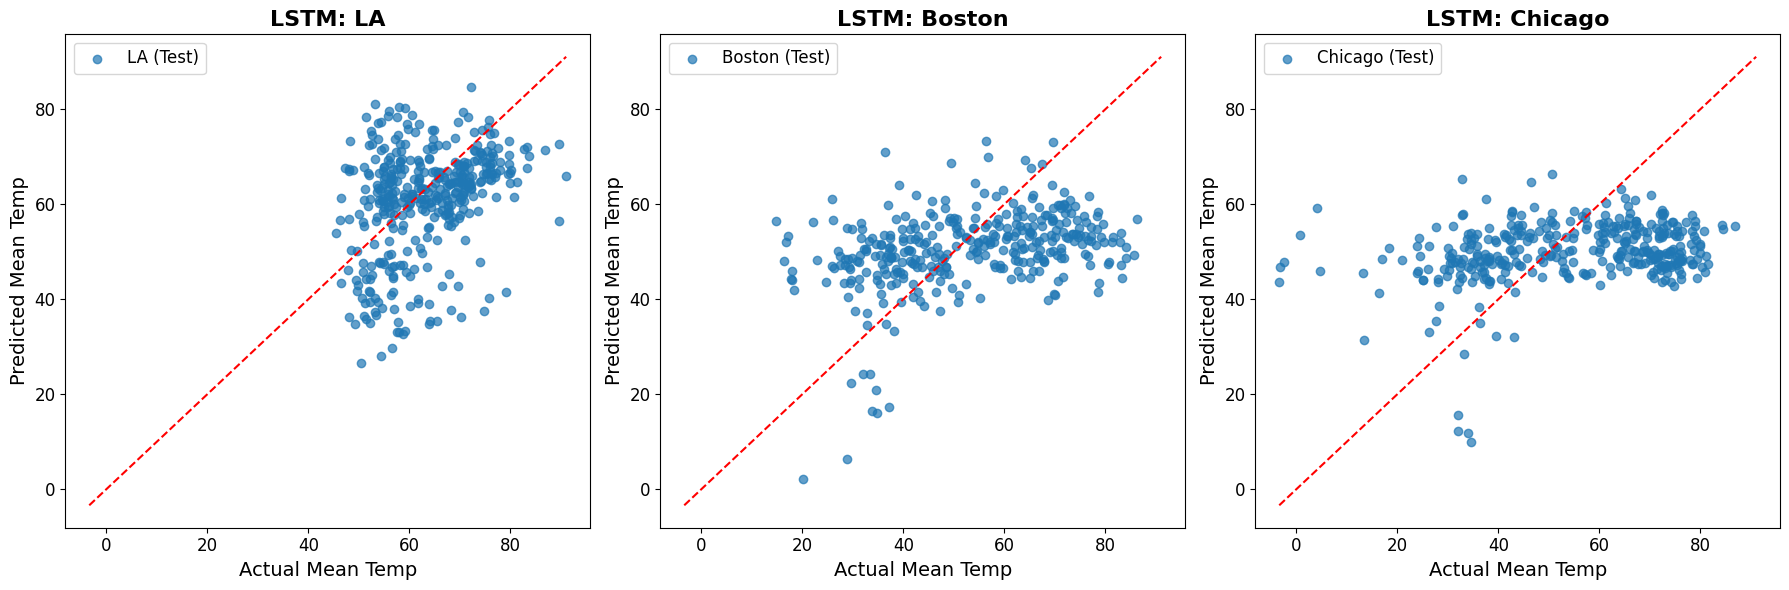

In [ ]:
# Reshape data for LSTM input (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))

# Compile and fit the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculating metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
adj_r2_lstm = 1 - (1 - r2_lstm) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Printing metrics
print(f"LSTM Metrics:")
print(f"MSE: {mse_lstm}")
print(f"R^2: {r2_lstm}")
print(f"Adjusted R^2: {adj_r2_lstm}")
print()

# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    axes[i].scatter(y_test[X_test[city] == 1], y_pred_lstm[X_test[city] == 1], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'LSTM: {city}', fontsize=16, fontweight='bold')
    axes[i].legend(fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

### Final Values

In [ ]:
metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'KNN', 'SVM', 'LSTM'],
    'MSE': [mse_lin_reg, mse_dt, mse_rf, mse_xgb, mse_gb, mse_knn, mse_svm, mse_lstm],
    'R^2': [r2_lin_reg, r2_dt, r2_rf, r2_xgb, r2_gb, r2_knn, r2_svm, r2_lstm],
    'Adjusted R^2': [adj_r2_lin_reg, adj_r2_dt, adj_r2_rf, adj_r2_xgb, adj_r2_gb, adj_r2_knn, adj_r2_svm, adj_r2_lstm]
}

# Creating the DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

               Model         MSE       R^2  Adjusted R^2
0  Linear Regression  214.431311  0.162047      0.154332
1      Decision Tree  285.504913 -0.115693     -0.125967
2      Random Forest  149.965368  0.413967      0.408571
3            XGBoost  159.055682  0.378444      0.372720
4  Gradient Boosting  146.217852  0.428611      0.423350
5                KNN  202.455355  0.208847      0.201562
6                SVM  180.132773  0.296079      0.289597
7               LSTM  247.105224  0.034365      0.025473


## "Best" Model Tuning (With Hyperparameters)

### Gradient Boosting (Highest Adj R^2)

In [ ]:
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Apply GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the data
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
# Print the best parameters for Gradient Boosting
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Make predictions using the best model
y_pred_gb = best_gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
adj_r2_gb = 1 - (1 - r2_gb) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Gradient Boosting Metrics:")
print(f"MSE: {mse_gb}")
print(f"R^2: {r2_gb}")
print(f"Adjusted R^2: {adj_r2_gb}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Metrics:
MSE: 141.4590334298273
R^2: 0.44720780913744085
Adjusted R^2: 0.4421176416341023


### Random Forest

In [ ]:
rf_model = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Apply GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the data
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Random Forest Metrics:")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")
print(f"Adjusted R^2: {adj_r2_rf}")

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Metrics:
MSE: 140.41087218246312
R^2: 0.45130380313838314
Adjusted R^2: 0.44625135197022825


### XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Apply GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)

# Make predictions using the best model
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = 1 - (1 - r2_xgb) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"XGBoost Metrics:")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")
print(f"Adjusted R^2: {adj_r2_xgb}")

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Metrics:
MSE: 141.14639408886688
R^2: 0.4484295380157529
Adjusted R^2: 0.4433506203179237


## Ensemble Method Using Random Forrest and XGBoost

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Get predictions from the tuned models
rf_train_preds = best_rf_model.predict(X_train).reshape(-1, 1)
xgb_train_preds = best_xgb_model.predict(X_train).reshape(-1, 1)

rf_test_preds = best_rf_model.predict(X_test).reshape(-1, 1)
xgb_test_preds = best_xgb_model.predict(X_test).reshape(-1, 1)

# Combine predictions for training the meta-model
meta_train_X = np.hstack((rf_train_preds, xgb_train_preds))
meta_test_X = np.hstack((rf_test_preds, xgb_test_preds))

# Target remains the same
meta_train_y = y_train

# Train a meta-model (using Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_train_X, meta_train_y)

# Make predictions using the meta-model
ensemble_test_preds = meta_model.predict(meta_test_X)

# Evaluate the ensemble
mse_ensemble = mean_squared_error(y_test, ensemble_test_preds)
r2_ensemble = r2_score(y_test, ensemble_test_preds)
adj_r2_ensemble = 1 - (1 - r2_ensemble) * (len(y_test) - 1) / (len(y_test) - meta_test_X.shape[1] - 1)

print(f"Ensemble Metrics:")
print(f"MSE: {mse_ensemble}")
print(f"R^2: {r2_ensemble}")
print(f"Adjusted R^2: {adj_r2_ensemble}")

Ensemble Metrics:
MSE: 153.35564505695498
R^2: 0.40071834963987396
Adjusted R^2: 0.39962277075438923


## Overall Best Model Graph and City Metrics

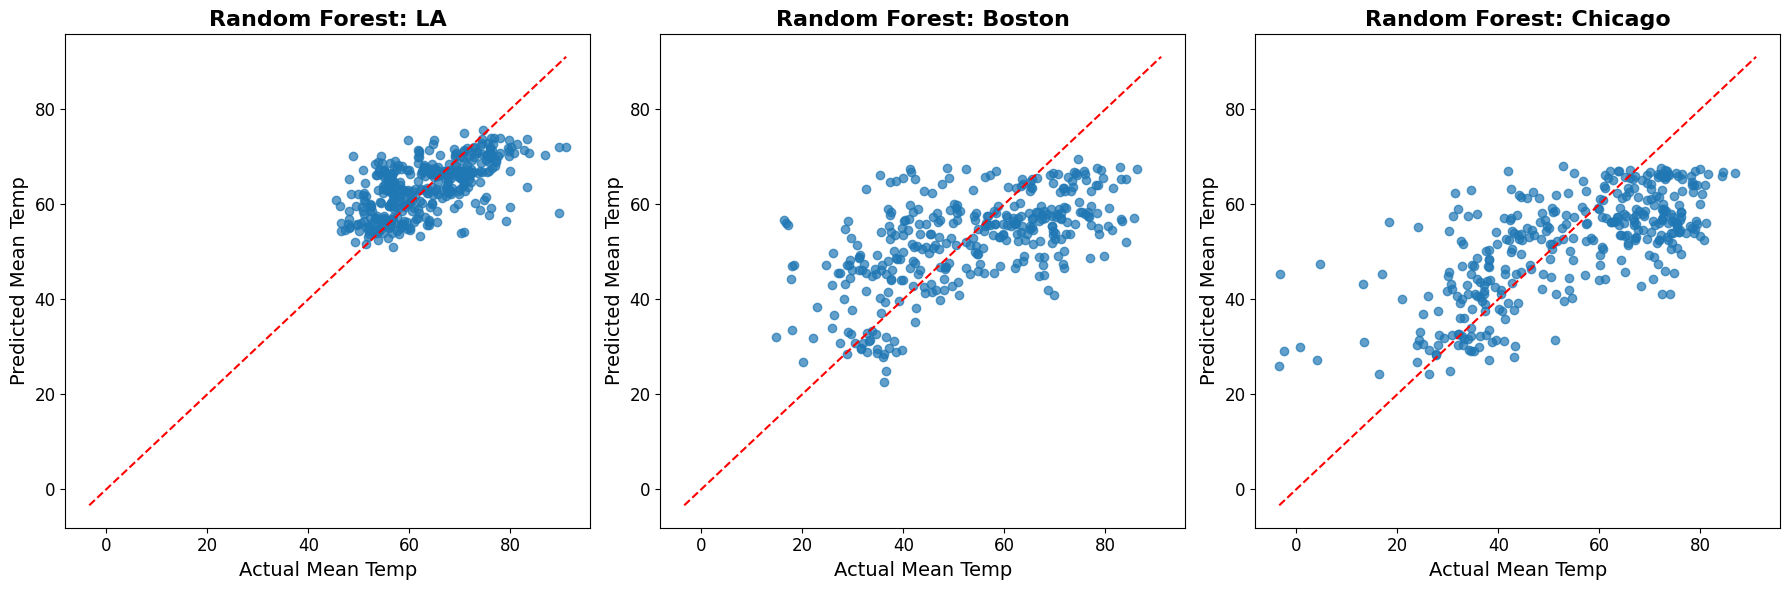

In [36]:
# Creating subplots for the cities
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, city in enumerate(['LA', 'Boston', 'Chicago']):
    city_mask = X_test[city] == 1
    axes[i].scatter(y_test[city_mask], y_pred_rf[city_mask], alpha=0.7, label=f'{city} (Test)')
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

    # Set plot labels and title
    axes[i].set_xlabel('Actual Mean Temp', fontsize=14)
    axes[i].set_ylabel('Predicted Mean Temp', fontsize=14)
    axes[i].set_title(f'Random Forest: {city}', fontsize=16, fontweight='bold')
    axes[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

In [37]:
# Calculating MSE, R^2, and Adjusted R^2 for each city
for city in ['LA', 'Boston', 'Chicago']:
    city_mask = X_test[city] == 1
    y_test_city = y_test[city_mask]
    y_pred_city = y_pred_rf[city_mask]

    # Calculate the metrics
    mse_city = mean_squared_error(y_test_city, y_pred_city)
    r2_city = r2_score(y_test_city, y_pred_city)
    adj_r2_city = 1 - (1 - r2_city) * (len(y_test_city) - 1) / (len(y_test_city) - X_test.shape[1] - 1)
    print(f"{city} Metrics:")
    print(f"MSE: {mse_city}")
    print(f"R^2: {r2_city}")
    print(f"Adjusted R^2: {adj_r2_city}")
    print()

LA Metrics:
MSE: 52.43079382689202
R^2: 0.362633450250356
Adjusted R^2: 0.34568221222509943

Boston Metrics:
MSE: 187.17652430536705
R^2: 0.34653862232709265
Adjusted R^2: 0.32720544547286456

Chicago Metrics:
MSE: 189.5163506664314
R^2: 0.4527791186146152
Adjusted R^2: 0.4371442362893184

